# Generate all connected graphs (doesn't work)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

The idea: (note, it doesn't work, and the program already subtly disagrees with this description)

Let's assume that:

* Nodes are given in a topological order (as for every graph we can put them in a topological order)
* Edges are given in only one direction (always i<j, for i→j)
* Edges are given in in lexicographic order (so for ij and kl either i<k or i=k and j<l)
* Graph is connected. Because we are doing it in topological order, it implies that for the very first ij, we have i=0, but for all others, i ∈ {all previous i and j}. We have only one beginning, but maybe several endings.
* As the graph is connected, every node has to be mentioned either as an i or as a j. Which means that we cannot do ij if ∃k: i<k<j, and k wasn't yet mentioned. That's coz ik cannot be mentioned after ij if j>k, and kx cannot be done if k wasn't mentioned before, which would make k inaccessible. As a way to avoid these traps, when it's time to move i (to one of the js), let's restrict it to the smallest j. Which means that of all possible topological orders we only use a small subset that explores all branches in a very measured way. (I think every graph can be represented like that, but I'm not sure).

We'll try to build it recursively. At each step:

* Know last considered i, last considered j, and all {j} that were unused as "i" so far (current leafs):
* Either:
    * increment j and include edge ij
    * increment j and skip it
    * move i to the smallest unused j, reset j to i+1, and include it (we cannot skip it). Remove this j from "unused {j}s".

In [28]:
def plot_graphs(graphs):
    n = len(graphs)
    plt.figure(figsize=(8,8))
    k = int(np.sqrt(n))
    for i in range(n):
        plt.subplot(k+1,k+1,i+1)
        g = nx.Graph()
        for e in graphs[i]:            
            g.add_edge(e[0],e[1])
        nx.draw_kamada_kawai(g, node_size=50)

#plot_graphs([[(0,1),(1,2),(1,3)]])

[[(0, 1), (0, 2), (0, 3), (1, 3)],
 [(0, 1), (0, 2), (0, 3), (1, 3), (2, 3)],
 [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)],
 [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)],
 [(0, 1), (0, 2), (1, 3)],
 [(0, 1), (0, 2), (1, 3), (2, 3)],
 [(0, 1), (0, 2), (2, 3)],
 [(0, 1), (0, 2), (1, 2), (1, 3)],
 [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)],
 [(0, 1), (0, 2), (1, 2), (2, 3)],
 [(0, 1), (1, 2), (1, 3)],
 [(0, 1), (1, 2), (1, 3), (2, 3)],
 [(0, 1), (1, 2), (2, 3)]]

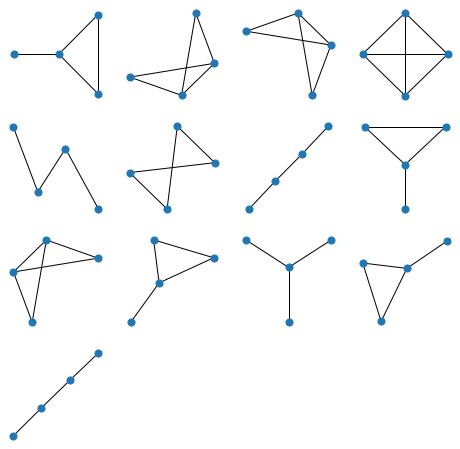

In [32]:
def make_graphs(n=2, i=None, j=None, js=None):
    """Make a graph, recursively."""
    out = []
    #print(i,j,js)
    if i is None: # First call
        out  = [[(0,1)]+r for r in make_graphs(n=n, i=0, j=1, js=[1])]
    else:
        if j<n-1:
            #print(f'adding {i,j+1}')
            out += [[(i,j+1)]+r for r in make_graphs(n=n, i=i, j=j+1, js=[k for k in js if k!=(j+1)]+[j+1])]
            #out += [          r for r in make_graphs(n=n, i=i, j=j+1, js=js)]
        if js and js[0]<n-1:
            i = js[0]
            if (i+1) in js: # Was used already, can either connect or not connect:
                out += [r for r in make_graphs(n=n, i=i, j=i+1, js=[k for k in js[1:] if k!=(i+1)]+[i+1])]
            #print(f'steppin to {(i,i+1)}')
            out += [[(i,i+1)]+r for r in make_graphs(n=n, i=i, j=i+1, js=[k for k in js[1:] if k!=(i+1)]+[i+1])]
    if not out: 
        #print('deadend')
        return [[]]
    #print(out)
    return out
                                                  
g = make_graphs(4)
plot_graphs(g)
g